# Property Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/joycechung/Downloads/Seaborn, Matplotlib, Pandas Plots/data/Hong_Kong_Clean.csv', low_memory=False)

In [3]:
df.head()

,Unnamed: 0,addr,sqft_area,block,district,district_id,building,contract,date,floor,...,sqft_actprice,sqft_actprice_value,sqft_price,sqft_price_value,state,winloss,winloss_flag,building_address,lat,lon
0,0,BLOCK 4 2#/F Room F,522.0,BLOCK 4,Chai Wan,1257,Lok Hin Terrace,Agreement,2018-05-09,2.0,...,NaN,0.00,9579.0,9578.54,NaN,NaN,-1,Lok Hin Terrace Chai Wan,22.2634,114.2403
1,1,BLOCK 2 1/F Room J,692.0,BLOCK 2,Chai Wan,1257,Lok Hin Terrace,Agreement,2018-01-03,1.0,...,NaN,0.00,5997.0,5997.11,NaN,NaN,-1,Lok Hin Terrace Chai Wan,22.2634,114.2403
2,2,BLOCK 5 4/F Room J,590.0,BLOCK 5,Chai Wan,1257,Lok Hin Terrace,Agreement,2017-10-03,4.0,...,8898.0,8898.13,7254.0,7254.24,NaN,316.0,1,Lok Hin Terrace Chai Wan,22.2634,114.2403
3,3,BLOCK 4 1#/F Room G,712.0,BLOCK 4,Chai Wan,1257,Lok Hin Terrace,Agreement,2017-07-13,1.0,...,NaN,0.00,6865.0,6865.17,NaN,NaN,-1,Lok Hin Terrace Chai Wan,22.2634,114.2403
4,4,BLOCK 5 1#/F Room K,522.0,BLOCK 5,Chai Wan,1257,Lok Hin Terrace,Agreement,2017-06-29,1.0,...,NaN,0.00,5747.0,5747.13,NaN,6.0,1,Lok Hin Terrace Chai Wan,22.2634,114.2403


In [72]:
df_sorted = df.sort_values('date')

df_sorted['date']

46611    1996-01-04
286982   1996-01-04
293318   1996-01-04
293317   1996-01-04
420427   1996-01-04
            ...    
101879   2018-05-10
51667    2018-05-10
102824   2018-05-10
104012   2018-05-10
54081    2018-05-10
Name: date, Length: 429400, dtype: datetime64[ns]

**Plot a graph showing the price per square feet over the years.**

In [3]:
#converting date to datetime
df['date'] = pd.to_datetime(df['date'])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429400 entries, 0 to 429399
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           429400 non-null  int64         
 1   addr                 429400 non-null  object        
 2   sqft_area            429388 non-null  float64       
 3   block                255731 non-null  object        
 4   district             429400 non-null  object        
 5   district_id          429400 non-null  int64         
 6   building             429400 non-null  object        
 7   contract             429400 non-null  object        
 8   date                 429400 non-null  datetime64[ns]
 9   floor                428452 non-null  float64       
 10  holddate             215456 non-null  object        
 11  id                   429400 non-null  int64         
 12  month                429400 non-null  object        
 13  price         

In [5]:
df_date_index = df.set_index('date')

In [7]:
df_date_index.sort_index(inplace=True)

<Axes: xlabel='date'>

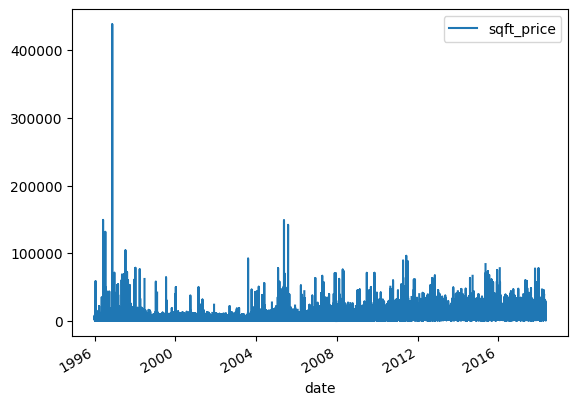

In [10]:
df_date_index.plot(y='sqft_price', use_index=True)

<Axes: xlabel='date'>

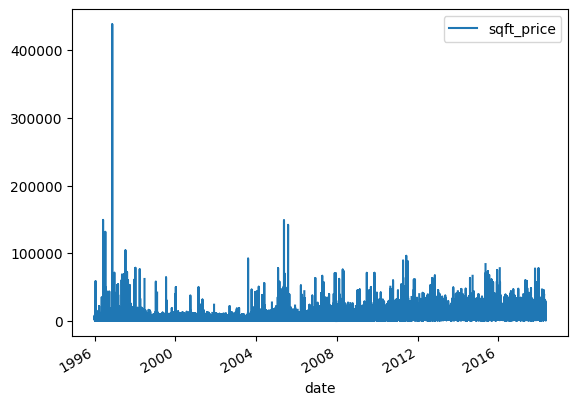

In [11]:
df.plot(x='date', y='sqft_price')

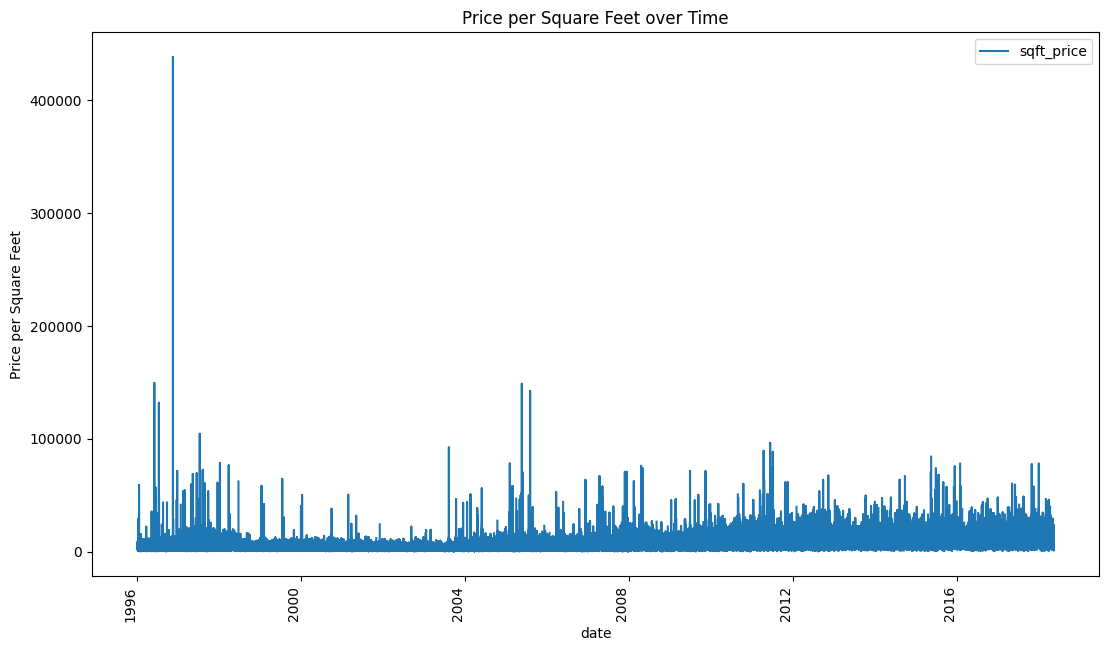

In [22]:
# Sort the DataFrame by 'date' in ascending order
# df_sorted = df.sort_values('date')

fig, ax = plt.subplots(figsize=(13,8))
df.plot(x='date', y='sqft_price', ax=ax, kind='line') #, kind = 'bar') #, ax=ax)

plt.ylabel('Price per Square Feet')
plt.title('Price per Square Feet over Time')
plt.xticks(rotation=90)
plt.show()

**Plot a graph showing the area per square feet against each district.**

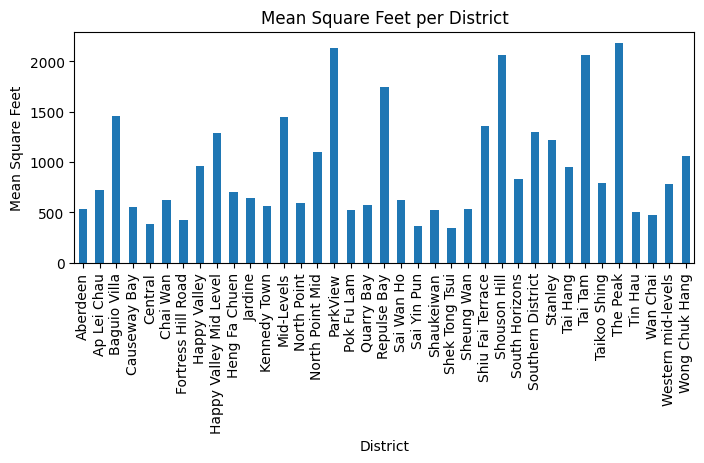

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the filtered DataFrame by 'district' and calculate the mean 'sqft_area'
mean_area = df.groupby('district')['sqft_area'].mean()

# Create a figure and axis with a custom size
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the bar graph using the filtered DataFrame
mean_area.iloc[:100].plot(kind='bar', ax=ax)

# Set the x-axis label and tick labels
plt.xlabel('District')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Mean Square Feet')

# Set the title
plt.title('Mean Square Feet per District')

# Show the plot
plt.show()

**Plot a graph showing relationship between floor and the price**

In [ ]:
plt.figure(figsize=(13,8))

In [33]:
import numpy as np

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. nan]


([<matplotlib.axis.XTick at 0x3f795f790>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

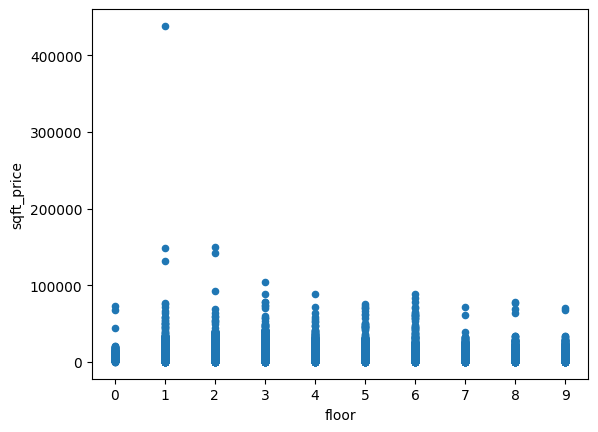

In [37]:
df.plot(x='floor', y='sqft_price', kind='scatter')
print(np.unique(df.floor))
plt.xticks(np.unique(df.floor)[:-1])